**Dependencies**

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.3/616.3 kB 7.0 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
import numpy
from PIL import Image


**Loading Yolo Model**

In [ ]:
model = YOLO('yolov8x.yaml')


                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640

**Training**

In [ ]:
results = model.train(data= "INSERT .YMAL FILE", epochs=51)

Ultralytics YOLOv8.0.175 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.yaml, data=/content/drive/MyDrive/RAPIDEV/car plates detection (2)/LPR.v20-v10.yolov8/data.yaml, epochs=51, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mas

**Validation**

In [ ]:
val_results = model.val()

Ultralytics YOLOv8.0.175 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x summary (fused): 268 layers, 68124531 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/RAPIDEV/car plates detection (2)/LPR.v20-v10.yolov8/valid/labels.cache... 612 images, 6 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 738. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:46<00:00,  1.20s/it]
                   all        612        738      0.937      0.844      0.933      0.716
Speed: 1.2ms preprocess, 64.6ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val


**Export model in "ONNX" format**

In [ ]:
success = model.export(format='onnx')

In [ ]:
pred = model("/content/drive/MyDrive/RAPIDEV/Car Number Plate Detection/test_img/test3.jpeg")

**Loading Model**

In [ ]:
model = YOLO("/content/drive/MyDrive/RAPIDEV/car plates detection (2)/runs/detect/train/weights/best.pt")

**Prediction**

In [ ]:
image =cv2.imread('/content/drive/MyDrive/RAPIDEV/Car Number Plate Detection/test_img/test3.jpeg')
results = model(image)


0: 544x640 1 license-plate, 5723.8ms
Speed: 12.0ms preprocess, 5723.8ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


In [ ]:
cap = cv2.VideoCapture('https://youtu.be/jvExiX2yMBc?si=NZkKCnPKPIOTJYUp')
object = None

while True:
    ret, frame = cap.read()
    if not ret:
        break

    result = model(frame)
    result = result[0].boxes
    result = result.cpu().numpy()

    for box in result.xyxy.tolist():
        [x,y,w,h] = box
        x, y, w, h = int(x), int(y), int(w), int(h)
        if object is None or (w-x)*(h-y) > object.shape[0]*object.shape[1]:
            object = frame[y:h, x:w]
            cv2_imshow(object)
            cv2.imwrite('output.jpg', object)

[109  90 135 107]


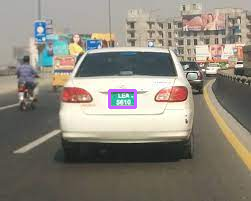

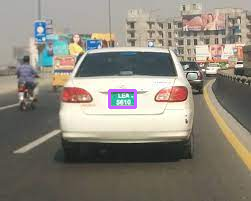

In [ ]:
for box in results:
  boxes = box.boxes.cpu().numpy()
  img = box.orig_img
  for box in boxes:
    r = box.xyxy[0].astype(int)
    print(r)
    cv2.rectangle(image, r[:2], r[2:], (255, 100, 200), 2)

cv2_imshow(img)
cv2_imshow(image)


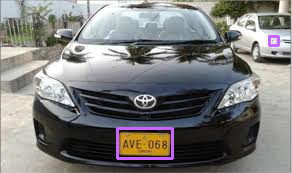

In [ ]:
for r in results:
  img = r.orig_img

cv2_imshow(img)


0: 384x640 (no detections), 61.4ms
Speed: 5.5ms preprocess, 61.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


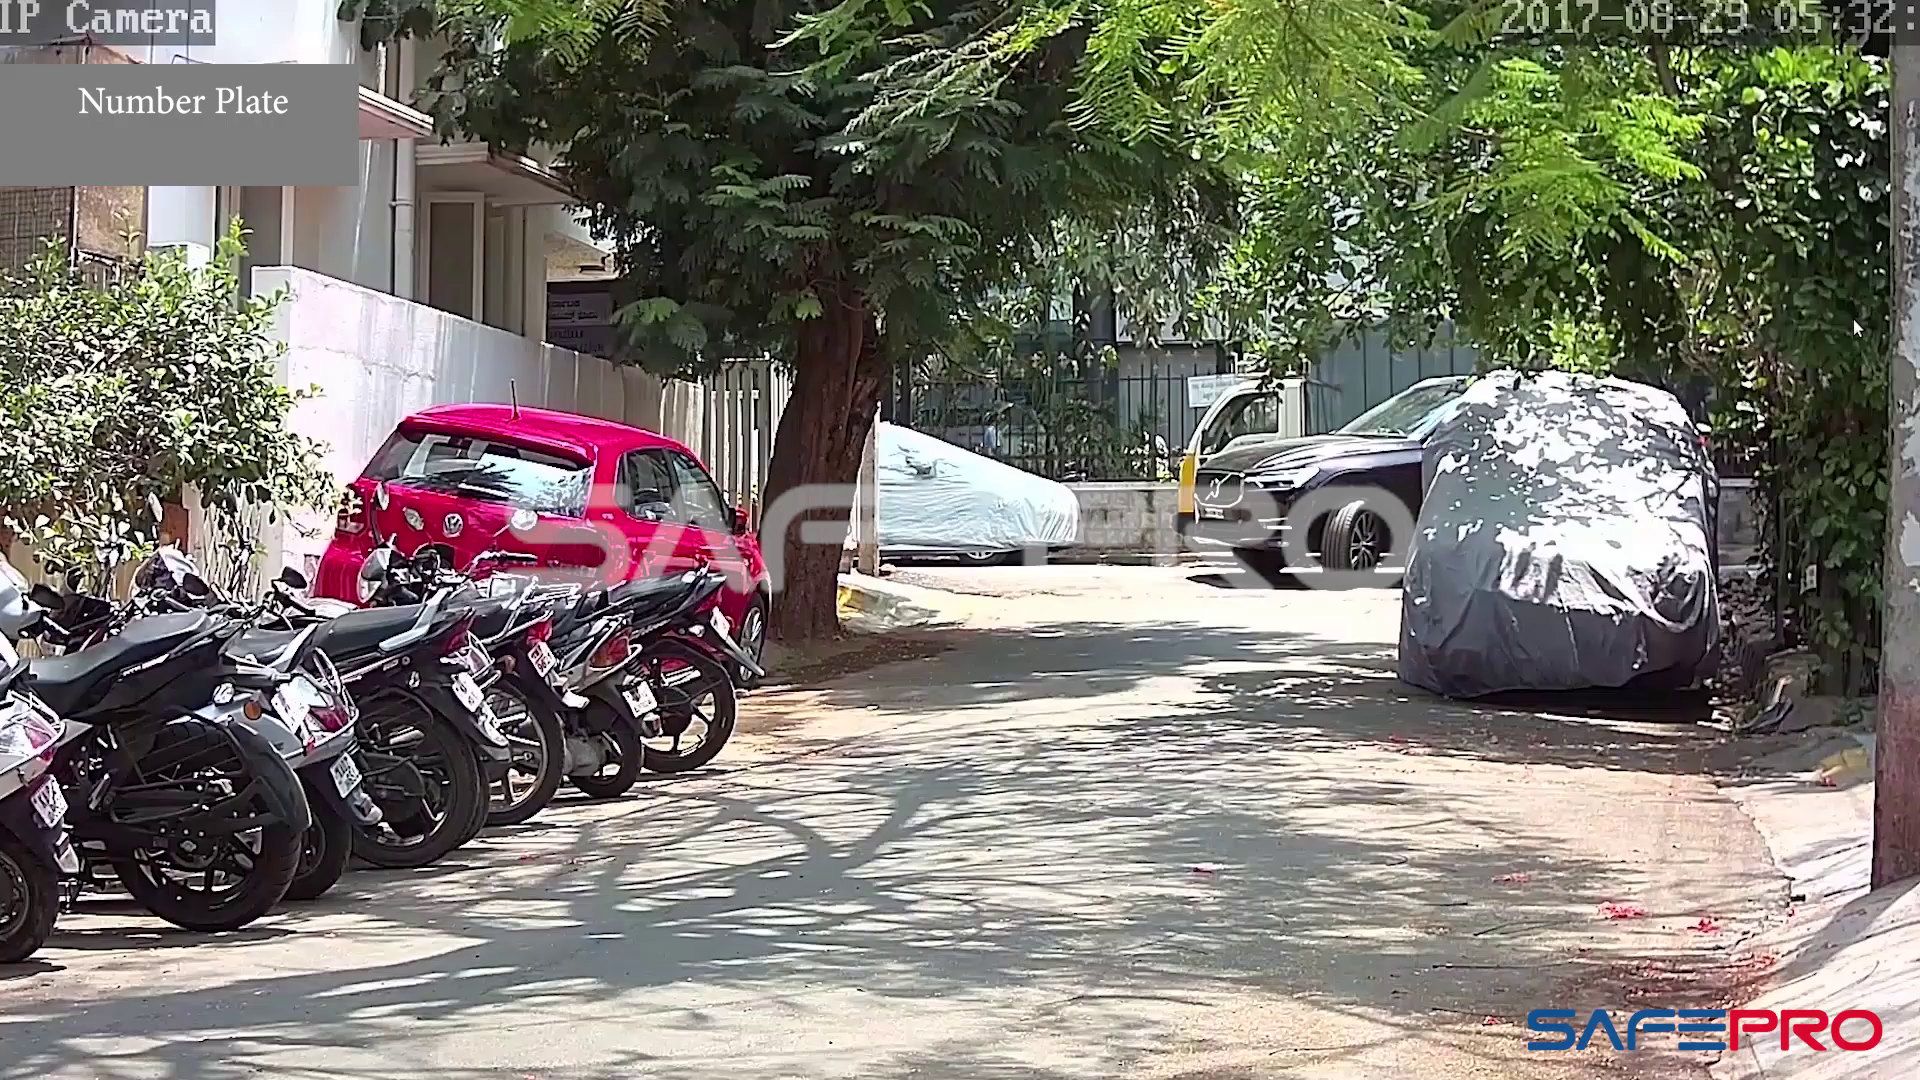


0: 384x640 (no detections), 61.6ms
Speed: 3.0ms preprocess, 61.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
# Open the video file
video_path = "/content/drive/MyDrive/RAPIDEV/car plates detection (2)/videoplayback.mp4"
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 tracking on the frame, persisting tracks between frames
        results = model.track(frame, persist=True)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2_imshow(annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

In [ ]:
source = "http://192.168.23.166:5522/video"

In [ ]:
cap = cv2.VideoCapture(source)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    #object detection
    results = model(frame)

    #process results
    predictions = results.pred[0]

    #draw bounding box
    frame_with_boxes = predictions.render()

    #display
    cv2_imshow(frame_with_boxes)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()